In [1]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
# import save_and_load
# import csv_decoder
import function as fn
import importlib
import time
from sklearn.datasets import make_hastie_10_2
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import os

In [2]:
isTrain_Test = 1 ## 0 is train, 1 is Test

if isTrain_Test == 0:  #Load Training Data set
    my_data_file_path = './High_Level_Features/higgs_highlevelfeatures_train.csv'
    
if isTrain_Test == 1:  #Load Training Data set
    my_data_file_path = './High_Level_Features/higgs_highlevelfeatures_test.csv'
    
    
# # read the data and store data in DataFrame
my_data = pd.read_csv(my_data_file_path)


totallist = my_data.columns
print("Total Columns : {}".format([element for element in totallist]))



Total Columns : ['higgs_pt', 'higgs_eta', 'higgs_m', 'non_higgs_leading_pt', 'non_higgs_leading_eta', 'non_higgs_leading_m', 'mjj', 'girth', 'CIJS', 'SIJS', 'DeltaEta', 'weight', 'isGGH', 'isVBF', 'isVH', 'isttH', 'eventindex']


In [3]:
# isTrain_Test = 0 ## 0 is train, 1 is Test

features = ["non_higgs_leading_eta", 
            "non_higgs_leading_m", 
            "mjj", 
            "girth",
            "CIJS",
            "SIJS",
            "DeltaEta"
            ]

my_data["target"] = my_data["isGGH"]
my_data["target"] = my_data["target"]+my_data["isVBF"]+my_data["isVBF"]
my_data["target"] = my_data["target"]+my_data["isVH"]+my_data["isVH"]+my_data["isVH"]
my_data["target"] = my_data["target"]+my_data["isttH"]+my_data["isttH"]+my_data["isttH"]+my_data["isttH"]


if isTrain_Test == 0:
    if os.path.exists("./BDT_Model_for_train") == 0:
        os.mkdir("./BDT_Model_for_train")
        path = "./BDT_Model_for_train/"
    else:
        path = "./BDT_Model_for_train/"
    
elif isTrain_Test == 1:
    if os.path.exists("./BDT_Model_for_test") == 0:
        os.mkdir("./BDT_Model_for_test")
        path = "./BDT_Model_for_test/"
    else:
        path = "./BDT_Model_for_test/"

        
counter = 0
for i, filename in enumerate(os.listdir(path)):
    if filename == "Data_train.csv" :
        counter += 1 
    elif filename == "Data_val.csv" :
        counter += 1 
    elif filename == "Data_test.csv" :
        counter += 1 
    

if counter == 0:
    ggH = shuffle(my_data[my_data["target"]==1])
    VBF = shuffle(my_data[my_data["target"]==2])
    VH = shuffle(my_data[my_data["target"]==3])
    ttH = shuffle(my_data[my_data["target"]==4])
    
    if isTrain_Test == 0:  #Create Training Data set
        ggH_train = ggH[:170000]
        VBF_train = VBF[:170000]
        VH_train = VH[:170000]
        ttH_train = ttH[:170000]

        ggH_val = ggH[170000:195000]
        VBF_val = VBF[170000:195000]
        VH_val = VH[170000:195000]
        ttH_val = ttH[170000:195000]

        ggH_test = ggH[195000:220000]
        VBF_test = VBF[195000:220000]
        VH_test = VH[195000:220000]
        ttH_test = ttH[195000:220000]
    
    elif isTrain_Test == 1:  #Create Test Data set
        ggH_train = ggH[:229000]
        VBF_train = VBF[:229000]
        VH_train = VH[:229000]
        ttH_train = ttH[:229000]

        ggH_val = ggH[229000:229001]
        VBF_val = VBF[229000:229001]
        VH_val = VH[229000:229001]
        ttH_val = ttH[229000:229001]

        ggH_test = ggH[229001:229002]
        VBF_test = VBF[229001:229002]
        VH_test = VH[229001:229002]
        ttH_test = ttH[229001:229002]
    
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("total #",len(ggH),len(VBF),len(VH),len(ttH)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val),len(VH_val),len(ttH_val)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))
    
    Data_train, Data_val, Data_test = ggH_train, ggH_val, ggH_test
    
    for element in [VBF_train,VH_train,ttH_train]:
        Data_train = pd.concat([Data_train,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_val,VH_val,ttH_val]:
        Data_val = pd.concat([Data_val,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_test,VH_test,ttH_test]:
        Data_test = pd.concat([Data_test,element],ignore_index=True,axis=0,join='inner')
    
    Data_train.to_csv(path + "Data_train.csv",index = 0)
    Data_val.to_csv(path + "Data_val.csv",index = 0)
    Data_test.to_csv(path + "Data_test.csv",index = 0)
    
    
    
if counter == 3:
    
    Data_train = pd.read_csv(path + "Data_train.csv")
    Data_val = pd.read_csv(path + "Data_val.csv")
    Data_test = pd.read_csv(path + "Data_test.csv")
    
    ggH_train = Data_train[Data_train["isGGH"]==1]
    ggH_val = Data_val[Data_val["isGGH"]==1]
    ggH_test = Data_test[Data_test["isGGH"]==1]
    
    VBF_train = Data_train[Data_train["isVBF"]==1]
    VBF_val = Data_val[Data_val["isVBF"]==1]
    VBF_test = Data_test[Data_test["isVBF"]==1]
    
    VH_train = Data_train[Data_train["isVH"]==1]
    VH_val = Data_val[Data_val["isVH"]==1]
    VH_test = Data_test[Data_test["isVH"]==1]
    
    ttH_train = Data_train[Data_train["isttH"]==1]
    ttH_val = Data_val[Data_val["isttH"]==1]
    ttH_test = Data_test[Data_test["isttH"]==1]

    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val),len(VH_val),len(ttH_val)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))




X_train = Data_train[features]
Y_train = Data_train["target"]
X_test = Data_test[features]
Y_test = Data_test["target"]

print("\n")
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train),len(X_test),len(Y_train),len(Y_test)))

          ggH     VBF      VH     ttH   
Train #  229000  229000  229000  229000 
 Val #     1       1       1       1    
 Test #    1       1       1       1    


         Xtrain  Xtest   Ytrain  Ytest  
Train #  916000    4     916000    4    


# BDT Model Training

In [4]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################
GBDT, Ada = 0, 0
for i, filename in enumerate(os.listdir("./BDT_Model_for_train/")):
    if filename == "clf_GBDT_w_mjj.h5" :
        GBDT += 1 
#     elif filename == "clf_Ada.h5" :
#         Ada += 1 

if GBDT == 0:
    rand = np.random.randint(1000000)
    clf_GBDT = GradientBoostingClassifier(
                n_estimators=500,
                learning_rate=0.3,
                max_depth=2, 
                min_samples_split = 0.25,
                min_samples_leaf = 0.05,
    #             min_impurity_split = 0.00001,
    #             validation_fraction = 0.1,
                random_state= rand,  #np.random,
                verbose = 1
                )
    clf_GBDT.fit(X_train,Y_train)
    dump(clf_GBDT, path+"clf_GBDT_w_mjj.h5")
    
ticks_2 = time.time()
    
# if Ada == 0:
#     clf_Ada = AdaBoostClassifier(
#             DecisionTreeClassifier(max_depth=2),
#             n_estimators=500,
#             learning_rate=1)
    
#     clf_Ada.fit(X_train,Y_train)
#     dump(clf_Ada, path+"clf_Ada.h5")

if GBDT == 1:
#     clf_GBDT = load(path+"clf_GBDT.h5")
    clf_GBDT = load("./BDT_Model_for_train/clf_GBDT_w_mjj.h5")
 
    
# if Ada == 1:
#     clf_Ada = load(path+"clf_Ada.h5")

############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime consumption : {:.4f} min for GBDT\033[0;m".format(totaltime/60.))
# totaltime =  ticks_3 - ticks_2
# print("\033[3;33mTime consumption : {:.4f} min for AdaBDT\033[0;m".format(totaltime/60.))


Fri Mar 12 07:25:37 2021
Time consumption : 0.0011 min for GBDT


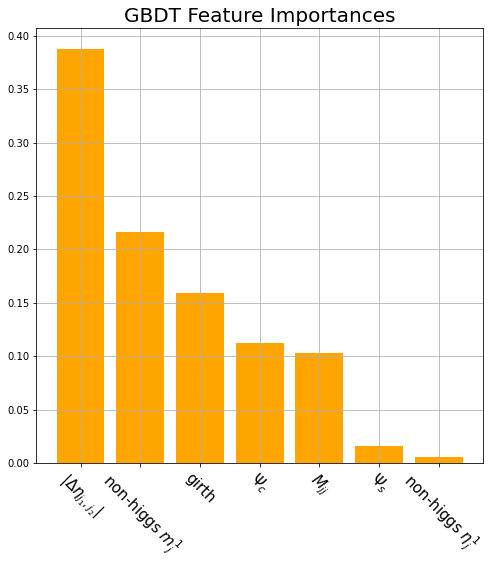

In [5]:
namelist = [#"higgs $Pt_{j}$","higgs $\eta_{j}$","higgs $m_{j}$",
#         "non-higgs $Pt^1_{j}$",
        "non-higgs $\eta^1_{j}$","non-higgs $m^1_{j}$",
        "$M_{jj}$",
        #"non-higgs $Pt^2_{j}$","non-higgs $\eta^2_{j}$","non-higgs $m^2_{j}$",
        "girth","$\Psi_c$","$\Psi_s$","$|\Delta\eta_{j_1, j_2}|$"]

importances = clf_GBDT.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf_GBDT.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
namelist_inorder = []
for i in indices:
    namelist_inorder.append(namelist[i])


plt.figure(figsize=(8,8))
plt.title("GBDT Feature Importances",fontsize=20)

plt.bar(range(X_train.shape[1]), 
         importances[indices],
         color="orange", 
#          yerr=std[indices], 
         align="center")
plt.grid(True)
plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
plt.show()

# Study the Performance of BDT

In [17]:
features = [#"higgs_pt","higgs_eta","higgs_m",
#        "non_higgs_leading_pt",
        "non_higgs_leading_eta","non_higgs_leading_m",
        "mjj",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]
path_train = "./BDT_Model_for_train/"
path_test = "./BDT_Model_for_test/"
Data_train = pd.read_csv(path_train + "Data_train.csv")
Data_test = pd.read_csv(path_test + "Data_train.csv")

# prediction_GBDT_test = clf_GBDT.predict_proba(Data_test[features])
prediction_GBDT_test = np.load("./Models_origin/pre_GBDT_w_mjj.npy")
# pre_2CNN_1n1c1c = np.load("./Models_origin/2CNN_1n1c1c.npy")
# pre_2CNN_0n1c1c = np.load("./Models_origin/2CNN_0n1c1c.npy")
# pre_2CNN_1n0c1c = np.load("./Models_origin/2CNN_1n0c1c.npy")
# pre_2CNN_1n1c0c = np.load("./Models_origin/2CNN_1n1c0c.npy")

pre_2CNN_1n1c1c = np.load("./Models/2CNN_1n1c1c.npy")
pre_2CNN_0n1c1c = np.load("./Models/2CNN_0n1c1c.npy")
pre_2CNN_1n0c1c = np.load("./Models/2CNN_1n0c1c.npy")
pre_2CNN_1n1c0c = np.load("./Models/2CNN_1n1c0c.npy")

# pre_2CNN_1n1c1c = np.load("./Models/2CNN_1n1c1c.npy")
# pre_2CNN_0n1c1c = np.load("./Models/2CNN_1n0c0c.npy")
# pre_2CNN_1n0c1c = np.load("./Models/2CNN_0n1c0c.npy")
# pre_2CNN_1n1c0c = np.load("./Models/2CNN_0n0c1c.npy")


Data_train["PTH"],Data_train["evtweight"] = Data_train["higgs_pt"],Data_train["weight"]
Data_test["PTH"],Data_test["evtweight"] = Data_test["higgs_pt"],Data_test["weight"]

Data_test["pre_BDT_out1"],Data_test["pre_BDT_out2"] = prediction_GBDT_test[:,0], prediction_GBDT_test[:,1]
Data_test["pre_BDT_out3"],Data_test["pre_BDT_out4"] = prediction_GBDT_test[:,2], prediction_GBDT_test[:,3]

Data_test["pre_2CNN_1n1c1c_out1"],Data_test["pre_2CNN_1n1c1c_out2"] = pre_2CNN_1n1c1c[:,0], pre_2CNN_1n1c1c[:,1]
Data_test["pre_2CNN_1n1c1c_out3"],Data_test["pre_2CNN_1n1c1c_out4"] = pre_2CNN_1n1c1c[:,2], pre_2CNN_1n1c1c[:,3]

Data_test["pre_2CNN_0n1c1c_out1"],Data_test["pre_2CNN_0n1c1c_out2"] = pre_2CNN_0n1c1c[:,0], pre_2CNN_0n1c1c[:,1]
Data_test["pre_2CNN_0n1c1c_out3"],Data_test["pre_2CNN_0n1c1c_out4"] = pre_2CNN_0n1c1c[:,2], pre_2CNN_0n1c1c[:,3]

Data_test["pre_2CNN_1n0c1c_out1"],Data_test["pre_2CNN_1n0c1c_out2"] = pre_2CNN_1n0c1c[:,0], pre_2CNN_1n0c1c[:,1]
Data_test["pre_2CNN_1n0c1c_out3"],Data_test["pre_2CNN_1n0c1c_out4"] = pre_2CNN_1n0c1c[:,2], pre_2CNN_1n0c1c[:,3]

Data_test["pre_2CNN_1n1c0c_out1"],Data_test["pre_2CNN_1n1c0c_out2"] = pre_2CNN_1n1c0c[:,0], pre_2CNN_1n1c0c[:,1]
Data_test["pre_2CNN_1n1c0c_out3"],Data_test["pre_2CNN_1n1c0c_out4"] = pre_2CNN_1n1c0c[:,2], pre_2CNN_1n1c0c[:,3]


# Data_train = Data_train[Data_train["PTH"] > 800]
# Data_test = Data_test[Data_test["PTH"] > 800]

ggH_train = Data_train[Data_train["isGGH"]==1]
ggH_test = Data_test[Data_test["isGGH"]==1]

VBF_train = Data_train[Data_train["isVBF"]==1]
VBF_test = Data_test[Data_test["isVBF"]==1]

VH_train = Data_train[Data_train["isVH"]==1]
VH_test = Data_test[Data_test["isVH"]==1]

ttH_train = Data_train[Data_train["isttH"]==1]
ttH_test = Data_test[Data_test["isttH"]==1]


print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))


X_train = Data_train[features]
Y_train = Data_train["target"]
X_test = Data_test[features]
Y_test = Data_test["target"]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train),len(X_test),len(Y_train),len(Y_test)))


importlib.reload(fn)
ggh_weight_train = fn.Weight(ggH_train, "ggF", index=2)
vbf_weight_train = fn.Weight(VBF_train, "VBF", index=2)
vh_weight_train = fn.Weight(VH_train, "VH", index=2)
tth_weight_train = fn.Weight(ttH_train, "ttH", index=2)
production_weight_train = [ggh_weight_train,vbf_weight_train,vh_weight_train,tth_weight_train]

ggh_weight_test = fn.Weight(ggH_test, "ggF", index=2)
vbf_weight_test = fn.Weight(VBF_test, "VBF", index=2)
vh_weight_test = fn.Weight(VH_test, "VH", index=2)
tth_weight_test = fn.Weight(ttH_test, "ttH", index=2)
production_weight_test = [ggh_weight_test,vbf_weight_test,vh_weight_test,tth_weight_test]

Xection_train = np.zeros((4,len(ggh_weight_train[2])))
Xection_test = np.zeros((4,len(ggh_weight_test[2])))
for i, element in enumerate(production_weight_train):
    Xection_train[i,:] = element[2]
for i, element in enumerate(production_weight_test):
    Xection_test[i,:] = element[2]

Xection_train_other = vbf_weight_train[2][0]+vh_weight_train[2][0]+tth_weight_train[2][0]
Xection_test_other = vbf_weight_test[2][0]+vh_weight_test[2][0]+tth_weight_test[2][0]

data_train = pd.concat([ggH_train,VBF_train[:int(170000*vbf_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')
data_train = pd.concat([data_train,VH_train[:int(170000*vh_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')
data_train = pd.concat([data_train,ttH_train[:int(170000*tth_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')

data_test = pd.concat([ggH_test,VBF_test[:int(229000*vbf_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')
data_test = pd.concat([data_test,VH_test[:int(229000*vh_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')
data_test = pd.concat([data_test,ttH_test[:int(229000*tth_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')

# data_train = data_train[(data_train["PTH"] > 400) & (data_train["PTH"] < 600)]
# data_test = data_test[(data_test["PTH"] > 400) & (data_test["PTH"] < 600)]

print(len(data_train),len(data_test))

X_train_weighted = data_train[features]
Y_train_weighted = data_train["target"]
X_test_weighted = data_test[features]
Y_test_weighted = data_test["target"]

print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Weighted","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train_weighted),len(X_test_weighted),len(Y_train_weighted),len(Y_test_weighted)))



          ggH     VBF      VH     ttH   
Train #  170000  170000  170000  170000 
 Test #  229000  229000  229000  229000 
         Xtrain  Xtest   Ytrain  Ytest  
Train #  680000  916000  680000  916000 
339998 457998
Weighted Xtrain  Xtest   Ytrain  Ytest  
Train #  339998  457998  339998  457998 


[[154424  20042  23465  31069]
 [ 23807 189484  11952   3757]
 [ 29880   9697 169268  20155]
 [ 20698   2183  11817 194302]]
          ggH ratio VBF ratio VH ratio ttH ratio ggH eff.  VBF eff.   VH eff.  ttH eff. 
ggH-like   67.49    10.40    13.06     9.05      67.43     10.40     13.05     9.04   
VBF-like    9.05    85.58     4.38     0.99      8.75      82.74     4.23      0.95   
VH-like    10.84     5.52    78.18     5.46      10.25     5.22      73.92     5.16   
ttH-like   12.46     1.51     8.09     77.94     13.57     1.64      8.80      84.85  


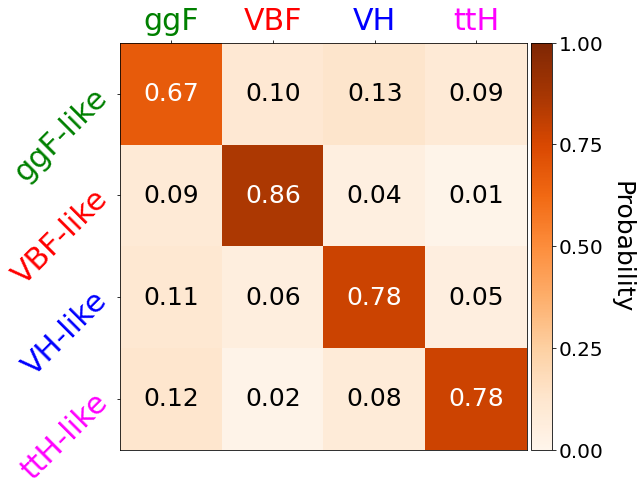

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# confusion = confusion_matrix(Y_test, clf_GBDT.predict(X_test))
# confusion = confusion_matrix(Y_test-1, np.argmax(prediction_GBDT_test,axis=1))
confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN_1n1c1c,axis=1))
# confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN_0n1c1c,axis=1))
# confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN_1n0c1c,axis=1))
# confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN_1n1c0c,axis=1))

# confusion = confusion_matrix(Y_test_weighted, clf_GBDT.predict(X_test_weighted))
# confusion = confusion_matrix(Y_test-1, np.argmax(prediction_2CNN_rotated,axis=1))

# confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN_rotated,axis=1))


# confusion = confusion_matrix(Y_test, clf_Ada.predict(X_test))
print(confusion)
ratio, eff = np.zeros(16), np.zeros(16)
k = 0
for i in range(4):
    for j in range(4):
        ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
        eff[k] = (confusion[j][i]/np.sum(confusion,axis=1)[i])*100.
        k += 1

print("{:^8}  {:^8} {:^8} {:^8} {:^9} {:^9} {:^9} {:^9} {:^9}".format("","ggH ratio","VBF ratio","VH ratio","ttH ratio","ggH eff.","VBF eff.","VH eff.","ttH eff."))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("ggH-like",ratio[0],ratio[1],ratio[2],ratio[3],eff[0],eff[1],eff[2],eff[3]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("VBF-like",ratio[4],ratio[5],ratio[6],ratio[7],eff[4],eff[5],eff[6],eff[7]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("VH-like",ratio[8],ratio[9],ratio[10],ratio[11],eff[8],eff[9],eff[10],eff[11]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("ttH-like",ratio[12],ratio[13],ratio[14],ratio[15],eff[12],eff[13],eff[14],eff[15]))
 
truelist = ["ggF","VBF","VH","ttH"]
likelist = ["ggF-like","VBF-like","VH-like","ttH-like"]

s = len(truelist)
# f = plt.figure(figsize=(s+5, s+5))
f, ax = plt.subplots(1,1, figsize=(s+5, s+5))

confusion_ = np.array([[ ratio[0],ratio[1],ratio[2],ratio[3]],
                       [ ratio[4],ratio[5],ratio[6],ratio[7]],
                       [ ratio[8],ratio[9],ratio[10],ratio[11]],
                       [ ratio[12],ratio[13],ratio[14],ratio[15]]])/100.

# plt.matshow(confusion_,fignum=f.number, cmap="Oranges")
    
# plt.xticks(range(confusion_.shape[1]), truelist, fontsize=25, rotation=45)
# plt.yticks(range(confusion_.shape[1]), likelist, fontsize=25, rotation=45)


# my_colors = ["green","red","blue","magenta"]
# for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)
    
# for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)
    
aa = ax.imshow(confusion_, cmap="Oranges", origin= "upper",vmin=0, vmax=1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Probability", rotation=270, fontsize=25, labelpad=30, y=0.5)
cbar.set_ticks([0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(["0.00","0.25","0.50","0.75","1.00"])
#, fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right"


ax.set_xticks(range(confusion_.shape[1]))
ax.set_xticklabels(truelist, fontsize=30, rotation=0)
ax.set_yticks(range(confusion_.shape[1]))
ax.set_yticklabels(likelist, fontsize=30, rotation=45)

my_colors = ["green","red","blue","magenta"]
ax.xaxis.tick_top()
for ticklabel, tickcolor in zip(ax.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(ax.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)



# plt.ylim((3.5,-0.5))
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=25)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(confusion_):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=25,color=colors)
# plt.savefig("./Higgs_Pt/confusion_matrix_BDT.pdf", transparent=True)

plt.tight_layout()
# plt.savefig("./Plots/confusion_matrix_BDT_w_mjj.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
# plt.savefig("./Plots/confusion_matrix_2CNN_1n1c1c.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

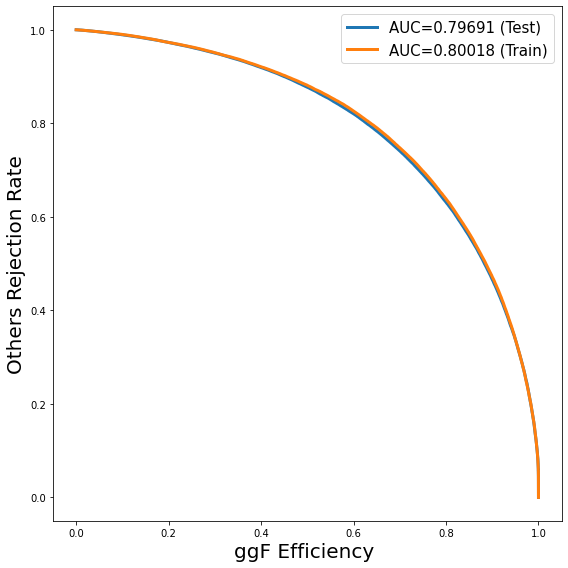

In [8]:
Weighted_event_Index = 1
axis = 0
if axis == 0:
    process = "ggF"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"

if Weighted_event_Index == 0:
    prediction_GBDT_test = clf_GBDT.predict_proba(X_test)
    prediction_GBDT_train = clf_GBDT.predict_proba(X_train)
elif Weighted_event_Index == 1:
    prediction_GBDT_test = clf_GBDT.predict_proba(X_test_weighted)
    prediction_GBDT_train = clf_GBDT.predict_proba(X_train_weighted)
    
# prediction_Ada_test = clf_Ada.predict_proba(X_test)
# prediction_Ada_train = clf_Ada.predict_proba(X_train)


# Denominator_train = Xection_train[int((axis+1)%4),:]+ Xection_train[int((axis+2)%4),:]+ Xection_train[int((axis+3)%4),:]
# Denominator_test = Xection_test[int((axis+1)%4),:]+ Xection_test[int((axis+2)%4),:]+ Xection_test[int((axis+3)%4),:]

discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

# discriminator_test = prediction_GBDT_test[:,0]/prediction_GBDT_test[:,3]

# discriminator_test = prediction_GBDT_test[:,axis]/ \
#                 (prediction_GBDT_test[:,int((axis+1)%4)]*((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+2)%4)]*((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+3)%4)]*((Xection_train[int((axis+3)%4),:]/Denominator_train)[0]))

# print((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+3)%4),:]/Denominator_train)[0])

# discriminator_train = prediction_GBDT_train[:,0]/prediction_GBDT_train[:,3]

# discriminator_train = prediction_GBDT_train[:,axis]/ \
#                 (prediction_GBDT_train[:,int((axis+1)%4)]*((Xection_test[int((axis+1)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+2)%4)]*((Xection_test[int((axis+2)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+3)%4)]*((Xection_test[int((axis+3)%4),:]/Denominator_test)[0]))

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

if Weighted_event_Index == 0:
    y_test = to_categorical(Y_test-1)
    y_train = to_categorical(Y_train-1)
elif Weighted_event_Index == 1:
    y_test = to_categorical(Y_test_weighted-1)
    y_train = to_categorical(Y_train_weighted-1)

test_auc_GBDT_test = metrics.roc_auc_score(y_test[:,axis],discriminator_test)
FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(y_test[:,axis],discriminator_test)

train_auc_GBDT_train = metrics.roc_auc_score(y_train[:,axis],discriminator_train)
FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(y_train[:,axis],discriminator_train)


plt.figure(figsize=(8,8))

plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,linewidth = 3, label='AUC={0:.5f} (Test)'.format(test_auc_GBDT_test))
plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,linewidth = 3, label='AUC={0:.5f} (Train)'.format(train_auc_GBDT_train))

plt.ylabel('Others Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

# plt.savefig("./Higgs_Pt/ROC_BDT.pdf", transparent=True)
plt.show()

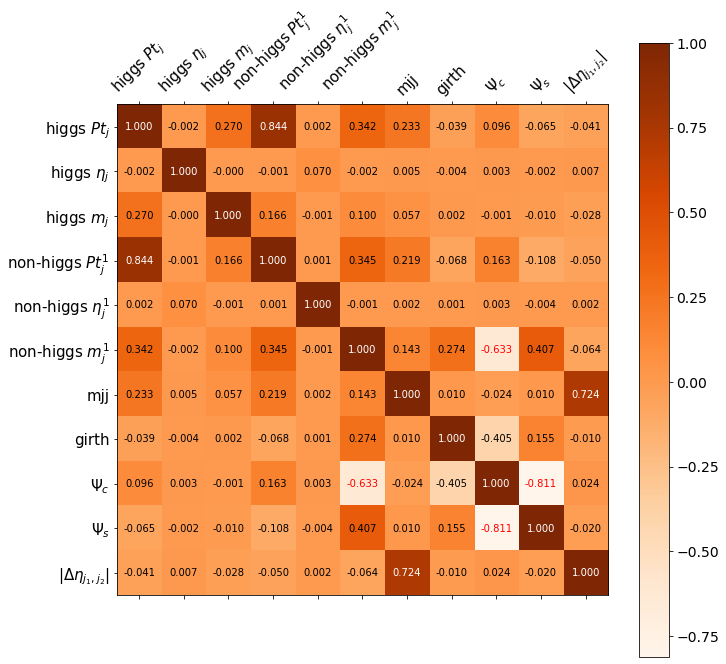

In [9]:
features = ["higgs_pt","higgs_eta","higgs_m",
       "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
            "mjj",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]

df = Data_train[Data_train["isGGH"]==1][features]


namelist = ["higgs $Pt_{j}$","higgs $\eta_{j}$","higgs $m_{j}$",
        "non-higgs $Pt^1_{j}$","non-higgs $\eta^1_{j}$","non-higgs $m^1_{j}$",
        "mjj",
        #"non-higgs $Pt^2_{j}$","non-higgs $\eta^2_{j}$","non-higgs $m^2_{j}$",
        "girth","$\Psi_c$","$\Psi_s$","$|\Delta\eta_{j_1, j_2}|$"]

s = len(namelist)
f = plt.figure(figsize=(s, s))

plt.matshow(df.corr(),fignum=f.number, cmap="Oranges")
plt.xticks(range(df.shape[1]), namelist, fontsize=15, rotation=45)
plt.yticks(range(df.shape[1]), namelist, fontsize=15)
# plt.ylim((9.5,-0.5))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(df.corr()):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',fontsize=10,color=colors)
plt.savefig("./Plots/correlation_matrix.pdf", transparent=True, bbox_inches='tight')
plt.show()

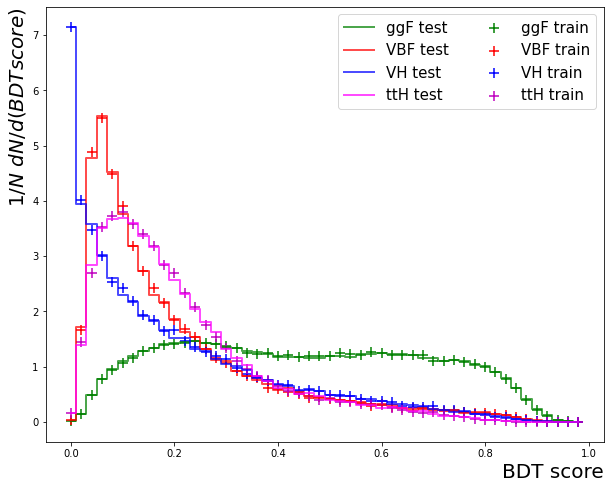

In [10]:
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"
    

xbin = np.linspace(0,1,51)

plt.figure(figsize=(10,8))
Datatest = pd.DataFrame()
Datatest["target"] = Y_test_weighted
Datatest["pre"] = discriminator_test
ggh = Datatest[Datatest["target"]==1]
vbf = Datatest[Datatest["target"]==2]
vh = Datatest[Datatest["target"]==3]
tth = Datatest[Datatest["target"]==4]



ggh_hist, ggh_bins = np.histogram(ggh["pre"], bins=xbin)
plt.step(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,color = "green", where='mid',linewidth=2, alpha=0.7,label="ggF test") 
vbf_hist, vbf_bins = np.histogram(vbf["pre"], bins=xbin)
plt.step(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,color = "red", where='mid',linewidth=2, alpha=0.7,label="VBF test") 
vh_hist, vh_bins = np.histogram(vh["pre"], bins=xbin)
plt.step(vh_bins[:-1], vh_hist.astype(np.float32)/sum(vh_hist)/0.02 ,color = "blue", where='mid',linewidth=2, alpha=0.7,label="VH test") 
tth_hist, tth_bins = np.histogram(tth["pre"], bins=xbin)
plt.step(tth_bins[:-1], tth_hist.astype(np.float32)/sum(tth_hist)/0.02 ,color = "magenta", where='mid',linewidth=2, alpha=0.7,label="ttH test") 



Datatrain = pd.DataFrame()
Datatrain["target"] = Y_train_weighted
Datatrain["pre_train"] = discriminator_train
ggh = Datatrain[Datatrain["target"]==1]
vbf = Datatrain[Datatrain["target"]==2]
vh = Datatrain[Datatrain["target"]==3]
tth = Datatrain[Datatrain["target"]==4]

ggh_hist, ggh_bins = np.histogram(ggh["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,marker = "+",c ="g",s=120,label="ggF train")
vbf_hist, vbf_bins = np.histogram(vbf["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,marker = "+",c ="r",s=120,label="VBF train")
vh_hist, vh_bins = np.histogram(vh["pre_train"], bins=xbin)
plt.scatter(vh_bins[:-1], vh_hist.astype(np.float32)/sum(vh_hist)/0.02 ,marker = "+",c ="b",s=120,label="VH train")
tth_hist, tth_bins = np.histogram(tth["pre_train"], bins=xbin)
plt.scatter(tth_bins[:-1], tth_hist.astype(np.float32)/sum(tth_hist)/0.02 ,marker = "+",c ="m",s=120,label="ttH train")


# plt.xlim(0,1)
plt.xlabel("BDT score", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=15)
# plt.savefig("./Higgs_Pt/BDT_score_seperate.pdf", transparent=True)
plt.show()

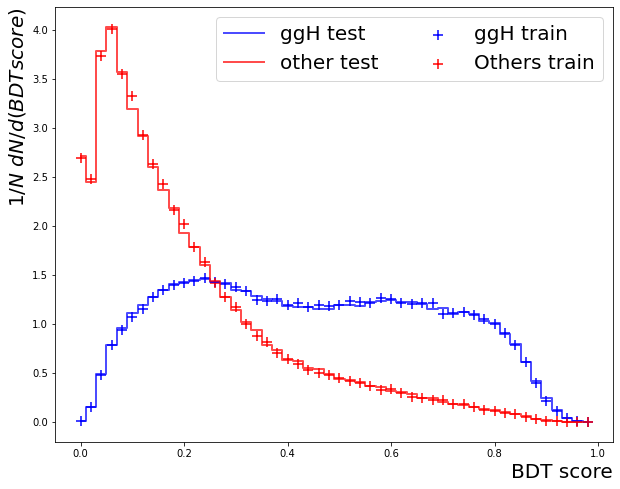

In [11]:
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"

xbin = np.linspace(0,1,51)

plt.figure(figsize=(10,8))
Datatest = pd.DataFrame()
Datatest["target"] = to_categorical(Y_test_weighted-1)[:,axis]
Datatest["pre"] = discriminator_test
inner = Datatest[Datatest["target"]==1]
outter = Datatest[Datatest["target"]==0]

ggh_hist, ggh_bins = np.histogram(inner["pre"], bins=xbin)
plt.step(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,color = "blue", where='mid',linewidth=2, alpha=0.7,label="ggH test") 
other_hist, other_bins = np.histogram(outter["pre"], bins=xbin)
plt.step(other_bins[:-1], other_hist.astype(np.float32)/sum(other_hist)/0.02 ,color = "red", where='mid',linewidth=2, alpha=0.7,label="other test") 


Datatrain = pd.DataFrame()
Datatrain["target"] = to_categorical(Y_train_weighted-1)[:,axis]
Datatrain["pre_train"] = discriminator_train
inner = Datatrain[Datatrain["target"]==1]
outter = Datatrain[Datatrain["target"]==0]

ggh_hist, ggh_bins = np.histogram(inner["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,marker = "+",c ="b",s=120,label="ggH train")
other_hist, other_bins = np.histogram(outter["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(other_bins[:-1], other_hist.astype(np.float32)/sum(other_hist)/0.02 ,marker = "+",c ="r",s=120,label="Others train")


# plt.xlim(0,10)
plt.xlabel("BDT score", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20)
# plt.savefig("./Higgs_Pt/BDT_score.pdf", transparent=True)
plt.show()

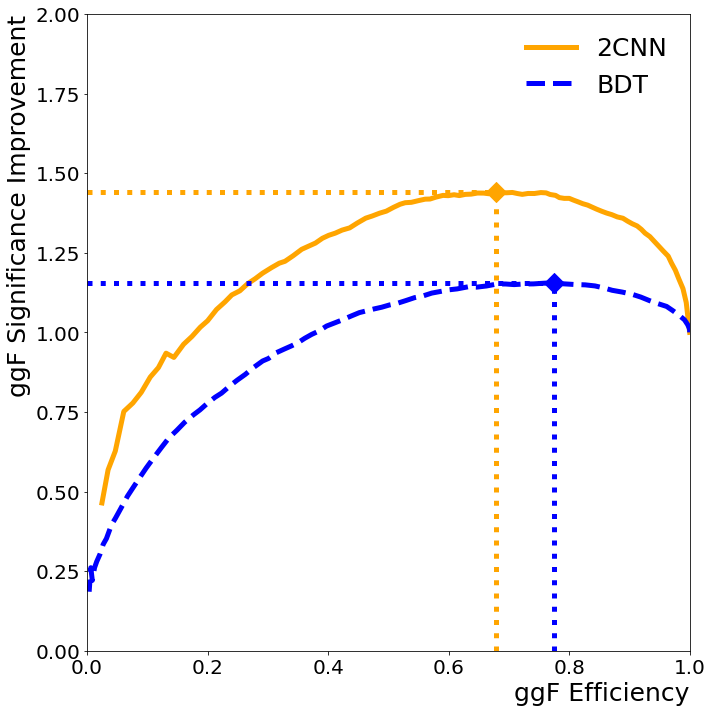

In [12]:
axis = 0
if axis == 0:
    process = "ggF"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"

sigimp_BDT = np.load("./Significance/sig_improBDT_w_mjj_"+str(process)+".npz")
# sigimp_BDT.files
sigimp_1n1c1c = np.load("./Significance/sig_impro2CNN_1n1c1c_"+str(process)+".npz")
sigimp_0n1c1c = np.load("./Significance/sig_impro2CNN_0n1c1c_"+str(process)+".npz")
sigimp_1n0c1c = np.load("./Significance/sig_impro2CNN_1n0c1c_"+str(process)+".npz")
sigimp_1n1c0c = np.load("./Significance/sig_impro2CNN_1n1c0c_"+str(process)+".npz")


fig, ax = plt.subplots(1,1, figsize=(10,10))

# plt.plot(sigimp_1n1c1c["ggF_eff"],sigimp_1n1c1c["sig_impro"],"-",color="orange",linewidth = 5,label="2CNN(1n1c1c)")
# plt.plot(sigimp_0n1c1c["ggF_eff"],sigimp_0n1c1c["sig_impro"],"-.",color="green",linewidth = 5,label="2CNN(0n1c1c)")
# plt.plot(sigimp_1n0c1c["ggF_eff"],sigimp_1n0c1c["sig_impro"],"--",color="cyan",linewidth = 5,label="2CNN(1n0c1c)")
# plt.plot(sigimp_1n1c0c["ggF_eff"],sigimp_1n1c0c["sig_impro"],".",color="red",linewidth = 5,label="2CNN(1n1c0c)")
# plt.plot(sigimp_BDT["ggF_eff"],sigimp_BDT["sig_impro"],"--",color="blue",linewidth = 5,label="BDT")

plt.plot(sigimp_1n1c1c["ggF_eff"],sigimp_1n1c1c["sig_impro"],"-",color="orange",linewidth = 5,label="2CNN")
plt.plot(sigimp_BDT["ggF_eff"],sigimp_BDT["sig_impro"],"--",color="blue",linewidth = 5,label="BDT")



cut_opt_1n1c1c = sigimp_1n1c1c["ggF_eff"][np.where(sigimp_1n1c1c["sig_impro"] == max(sigimp_1n1c1c["sig_impro"]))]
max_sig_1n1c1c = max(sigimp_1n1c1c["sig_impro"])

cut_opt_0n1c1c = sigimp_0n1c1c["ggF_eff"][np.where(sigimp_0n1c1c["sig_impro"] == max(sigimp_0n1c1c["sig_impro"]))]
max_sig_0n1c1c = max(sigimp_0n1c1c["sig_impro"])

cut_opt_1n0c1c = sigimp_1n0c1c["ggF_eff"][np.where(sigimp_1n0c1c["sig_impro"] == max(sigimp_1n0c1c["sig_impro"]))]
max_sig_1n0c1c = max(sigimp_1n0c1c["sig_impro"])

cut_opt_1n1c0c = sigimp_1n1c0c["ggF_eff"][np.where(sigimp_1n1c0c["sig_impro"] == max(sigimp_1n1c0c["sig_impro"]))]
max_sig_1n1c0c = max(sigimp_1n1c0c["sig_impro"])

cut_opt_BDT = sigimp_BDT["ggF_eff"][np.where(sigimp_BDT["sig_impro"] == max(sigimp_BDT["sig_impro"][:-5]))]
max_sig_BDT = max(sigimp_BDT["sig_impro"][:-5])

ax.axvline(cut_opt_1n1c1c ,ymin = 0 , ymax = max_sig_1n1c1c/2 , linewidth = 5, linestyle = ":", color = "orange")
ax.axhline(max_sig_1n1c1c ,xmin = 0 , xmax = cut_opt_1n1c1c , linewidth = 5, linestyle = ":", color = "orange")

# ax.axvline(cut_opt_0n1c1c ,ymin = 0 , ymax = max_sig_0n1c1c/2 , linewidth = 5, linestyle = ":", color = "green")
# ax.axhline(max_sig_0n1c1c ,xmin = 0 , xmax = cut_opt_0n1c1c , linewidth = 5, linestyle = ":", color = "green")

# ax.axvline(cut_opt_1n0c1c ,ymin = 0 , ymax = max_sig_1n0c1c/2 , linewidth = 5, linestyle = ":", color = "cyan")
# ax.axhline(max_sig_1n0c1c ,xmin = 0 , xmax = cut_opt_1n0c1c , linewidth = 5, linestyle = ":", color = "cyan")

# ax.axvline(cut_opt_1n1c0c ,ymin = 0 , ymax = max_sig_1n1c0c/2 , linewidth = 5, linestyle = ":", color = "red")
# ax.axhline(max_sig_1n1c0c ,xmin = 0 , xmax = cut_opt_1n1c0c , linewidth = 5, linestyle = ":", color = "red")

ax.axvline(cut_opt_BDT ,ymin = 0 , ymax = max_sig_BDT/2 , linewidth = 5, linestyle = ":", color = "blue")
ax.axhline(max_sig_BDT ,xmin = 0 , xmax = cut_opt_BDT , linewidth = 5, linestyle = ":", color = "blue")


plt.scatter(cut_opt_1n1c1c,max_sig_1n1c1c, marker="D", s=200 , c='orange')
# plt.scatter(cut_opt_0n1c1c,max_sig_0n1c1c, marker="D", s=200 , c='green')
# plt.scatter(cut_opt_1n0c1c,max_sig_1n0c1c, marker="D", s=200 , c='cyan')
# plt.scatter(cut_opt_1n1c0c,max_sig_1n1c0c, marker="D", s=200 , c='red')
plt.scatter(cut_opt_BDT,max_sig_BDT, marker="D", s=200 , c='blue')

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("ggF Efficiency", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel("ggF Significance Improvement", fontsize=25,horizontalalignment='right',y=1)

plt.xlim((0,1))
plt.ylim((0,2))
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) #,
# plt.savefig("./Plots/2CNN_sig_scan.pdf", transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

<ipython-input-18-29bcdcc5294b>:69: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_1n1c1c_test,1/FalsePositiveFull_2CNN_1n1c1c_test,"-", color='orange', linewidth = 3,label='Full 2CNN Architecture: AUC={0:.2f}'.format(test_auc_2CNN_1n1c1c_test))
<ipython-input-18-29bcdcc5294b>:70: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_0n1c1c_test,1/FalsePositiveFull_2CNN_0n1c1c_test,":", color='green', linewidth = 3,label='2CNN, No Neutral Layer: AUC={0:.2f}'.format(test_auc_2CNN_0n1c1c_test))
<ipython-input-18-29bcdcc5294b>:71: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_1n0c1c_test,1/FalsePositiveFull_2CNN_1n0c1c_test,"-.", color='cyan', linewidth = 3,label='2CNN, No Charged $p_T$ Layer: AUC={0:.2f}'.format(test_auc_2CNN_1n0c1c_test))
<ipython-input-18-29bcdcc5294b>:72: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN

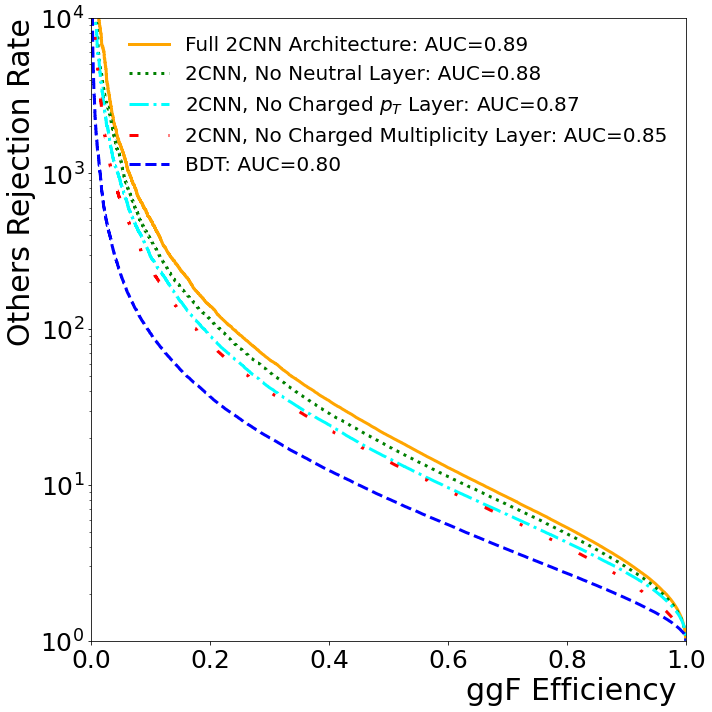

In [18]:
axis = 0
if axis == 0:
    process = "ggF"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"
    
# Denominator_test = Xection_test[int((axis+1)%4),:]+ Xection_test[int((axis+2)%4),:]+ Xection_test[int((axis+3)%4),:]


# prediction_GBDT_test = clf_GBDT.predict_proba(X_test_weighted)

prediction_GBDT_test = data_test["pre_BDT_out"+str(axis+1)]
prediction_2CNN_1n1c1c_test = data_test["pre_2CNN_1n1c1c_out"+str(axis+1)]
prediction_2CNN_0n1c1c_test = data_test["pre_2CNN_0n1c1c_out"+str(axis+1)]
prediction_2CNN_1n0c1c_test = data_test["pre_2CNN_1n0c1c_out"+str(axis+1)]
prediction_2CNN_1n1c0c_test = data_test["pre_2CNN_1n1c0c_out"+str(axis+1)]

# prediction_2CNN_test = data_test["pre_2CNN_out1"]/data_test["pre_2CNN_out4"]

# prediction_2CNN_test = data_test["pre_2CNN_out1"]/ \
#                 (data_test["pre_2CNN_out2"]*((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])+ \
#                  data_test["pre_2CNN_out3"]*((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])+ \
#                  data_test["pre_2CNN_out4"]*((Xection_train[int((axis+3)%4),:]/Denominator_train)[0]))


# prediction_2CNN_test = prediction_2CNN_test/(max(prediction_2CNN_test))



# enc = preprocessing.LabelBinarizer()
# y_test = enc.fit_transform(YY)
# y_train = enc.fit_transform(Y)

# y_test = to_categorical(Y_test-1)
# y_train = to_categorical(Y_train-1)

y_test = to_categorical(Y_test_weighted-1)

# test_auc_GBDT_test = metrics.roc_auc_score(y_test[:,axis],prediction_GBDT_test[:,axis])
test_auc_GBDT_test = metrics.roc_auc_score(y_test[:,axis],prediction_GBDT_test)
test_auc_2CNN_1n1c1c_test = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n1c1c_test)
test_auc_2CNN_0n1c1c_test = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_0n1c1c_test)
test_auc_2CNN_1n0c1c_test = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n0c1c_test)
test_auc_2CNN_1n1c0c_test = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n1c0c_test)

# FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(y_test[:,axis],prediction_GBDT_test[:,axis])
FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(y_test[:,axis],prediction_GBDT_test)
FalsePositiveFull_2CNN_1n1c1c_test, TruePositiveFull_2CNN_1n1c1c_test, _ = metrics.roc_curve(y_test[:,axis],prediction_2CNN_1n1c1c_test)
FalsePositiveFull_2CNN_0n1c1c_test, TruePositiveFull_2CNN_0n1c1c_test, _ = metrics.roc_curve(y_test[:,axis],prediction_2CNN_0n1c1c_test)
FalsePositiveFull_2CNN_1n0c1c_test, TruePositiveFull_2CNN_1n0c1c_test, _ = metrics.roc_curve(y_test[:,axis],prediction_2CNN_1n0c1c_test)
FalsePositiveFull_2CNN_1n1c0c_test, TruePositiveFull_2CNN_1n1c0c_test, _ = metrics.roc_curve(y_test[:,axis],prediction_2CNN_1n1c0c_test)




fig, ax = plt.subplots(1,1, figsize=(10,10))

# plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test, color='b', linewidth = 3, label='BDT: AUC={0:.5f}'.format(test_auc_GBDT_test))
# plt.plot(TruePositiveFull_2CNN_1n1c1c_test,1-FalsePositiveFull_2CNN_1n1c1c_test, color='orange', linewidth = 3,label='2CNN (1n1c1c): AUC={0:.5f}'.format(test_auc_2CNN_1n1c1c_test))
# plt.plot(TruePositiveFull_2CNN_0n1c1c_test,1-FalsePositiveFull_2CNN_0n1c1c_test, color='g', linewidth = 3,label='2CNN(0n1c1c): AUC={0:.5f}'.format(test_auc_2CNN_0n1c1c_test))
# plt.plot(TruePositiveFull_2CNN_1n0c1c_test,1-FalsePositiveFull_2CNN_1n0c1c_test, color='r', linewidth = 3,label='2CNN(1n0c1c): AUC={0:.5f}'.format(test_auc_2CNN_1n0c1c_test))
# # plt.plot(TruePositiveFull_2CNN_1n1c0c_test,1-FalsePositiveFull_2CNN_1n1c0c_test, color='orange', linewidth = 3,label='2CNN(1n1c0c): AUC={0:.5f}'.format(test_auc_2CNN_1n1c0c_test))


plt.plot(TruePositiveFull_2CNN_1n1c1c_test,1/FalsePositiveFull_2CNN_1n1c1c_test,"-", color='orange', linewidth = 3,label='Full 2CNN Architecture: AUC={0:.2f}'.format(test_auc_2CNN_1n1c1c_test))
plt.plot(TruePositiveFull_2CNN_0n1c1c_test,1/FalsePositiveFull_2CNN_0n1c1c_test,":", color='green', linewidth = 3,label='2CNN, No Neutral Layer: AUC={0:.2f}'.format(test_auc_2CNN_0n1c1c_test))
plt.plot(TruePositiveFull_2CNN_1n0c1c_test,1/FalsePositiveFull_2CNN_1n0c1c_test,"-.", color='cyan', linewidth = 3,label='2CNN, No Charged $p_T$ Layer: AUC={0:.2f}'.format(test_auc_2CNN_1n0c1c_test))
plt.plot(TruePositiveFull_2CNN_1n1c0c_test,1/FalsePositiveFull_2CNN_1n1c0c_test,linestyle=(0, (3, 10, 1, 10, 1, 10)), color='red', linewidth = 3,label='2CNN, No Charged Multiplicity Layer: AUC={0:.2f}'.format(test_auc_2CNN_1n1c0c_test))
plt.plot(TruePositiveFull_GBDT_test,1/FalsePositiveFull_GBDT_test,"--", color='blue', linewidth = 3, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))

# plt.plot(TruePositiveFull_2CNN_1n1c1c_test,1/FalsePositiveFull_2CNN_1n1c1c_test,"--", color='orange', linewidth = 3,label='2CNN (1N1C1C): AUC={0:.2f}'.format(test_auc_2CNN_1n1c1c_test))
# plt.plot(TruePositiveFull_2CNN_0n1c1c_test,1/FalsePositiveFull_2CNN_0n1c1c_test,":", color='green', linewidth = 3,label='2CNN(1N0C0C): AUC={0:.2f}'.format(test_auc_2CNN_0n1c1c_test))
# plt.plot(TruePositiveFull_2CNN_1n0c1c_test,1/FalsePositiveFull_2CNN_1n0c1c_test,"-.", color='cyan', linewidth = 3,label='2CNN(0N1C0C): AUC={0:.2f}'.format(test_auc_2CNN_1n0c1c_test))
# plt.plot(TruePositiveFull_2CNN_1n1c0c_test,1/FalsePositiveFull_2CNN_1n1c0c_test,".", color='red', linewidth = 1,label='2CNN(0N0C1C): AUC={0:.2f}'.format(test_auc_2CNN_1n1c0c_test))

# plt.plot(TruePositiveFull_2CNN_1n1c1c_test,1/FalsePositiveFull_2CNN_1n1c1c_test,"-", color='orange', linewidth = 3,label='2CNN: AUC={0:.2f}'.format(test_auc_2CNN_1n1c1c_test))
# plt.plot(TruePositiveFull_GBDT_test,1/FalsePositiveFull_GBDT_test,"--", color='blue', linewidth = 3, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))


eff_1n1c1c = sigimp_1n1c1c["ggF_eff"][np.where(sigimp_1n1c1c["sig_impro"] == max(sigimp_1n1c1c["sig_impro"]))]
rejection_rate_1n1c1c = sigimp_1n1c1c["rejection_rate"]

eff_0n1c1c = sigimp_0n1c1c["ggF_eff"][np.where(sigimp_0n1c1c["sig_impro"] == max(sigimp_0n1c1c["sig_impro"]))]
rejection_rate_0n1c1c = sigimp_0n1c1c["rejection_rate"]

eff_1n0c1c = sigimp_1n0c1c["ggF_eff"][np.where(sigimp_1n0c1c["sig_impro"] == max(sigimp_1n0c1c["sig_impro"]))]
rejection_rate_1n0c1c = sigimp_1n0c1c["rejection_rate"]

eff_1n1c0c = sigimp_1n1c0c["ggF_eff"][np.where(sigimp_1n1c0c["sig_impro"] == max(sigimp_1n1c0c["sig_impro"]))]
rejection_rate_1n1c0c = sigimp_1n1c0c["rejection_rate"]

eff_BDT = sigimp_BDT["ggF_eff"][np.where(sigimp_BDT["sig_impro"] == max(sigimp_BDT["sig_impro"]))]
rejection_rate_BDT = sigimp_BDT["rejection_rate"]


# plt.scatter(eff_0n1c1c,rejection_rate_0n1c1c, marker="D", s=200 , c='green')
# plt.scatter(eff_1n0c1c,rejection_rate_1n0c1c, marker="D", s=200 , c='cyan')
# plt.scatter(eff_1n1c0c,rejection_rate_1n1c0c, marker="D", s=200 , c='red')
# plt.scatter(eff_1n1c1c,rejection_rate_1n1c1c, marker="D", s=200 , c='orange')
# plt.scatter(eff_BDT,rejection_rate_BDT, marker="D", s=200 , c='blue')

plt.xlim((0,1))
plt.ylim((1,1E+4))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.yscale("log")
plt.ylabel('Others Rejection Rate', fontsize=30,horizontalalignment='right',y=1)
plt.xlabel(str(process)+' Efficiency ', fontsize=30,horizontalalignment='right',x=1)
plt.legend(ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()


plt.savefig("./Plots/Comparison_ROC_all.pdf", transparent=True, bbox_inches='tight')
plt.show()

<ipython-input-14-fb597bd675a1>:24: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_ggF_test,1/FalsePositiveFull_2CNN_ggF_test,"-", color='green', linewidth = 3,label='ggF: AUC={0:.2f}'.format(test_auc_2CNN_ggF_test))
<ipython-input-14-fb597bd675a1>:25: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_VBF_test,1/FalsePositiveFull_2CNN_VBF_test,"-.", color='red', linewidth = 3, label='VBF: AUC={0:.2f}'.format(test_auc_2CNN_VBF_test))
<ipython-input-14-fb597bd675a1>:26: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_VH_test,1/FalsePositiveFull_2CNN_VH_test,"--", color='blue', linewidth = 3, label='VH: AUC={0:.2f}'.format(test_auc_2CNN_VH_test))
<ipython-input-14-fb597bd675a1>:27: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(TruePositiveFull_2CNN_ttH_test,1/FalsePositiveFull_2CNN_ttH_test,":", color='magenta', linewidth = 3, label='ttH: A

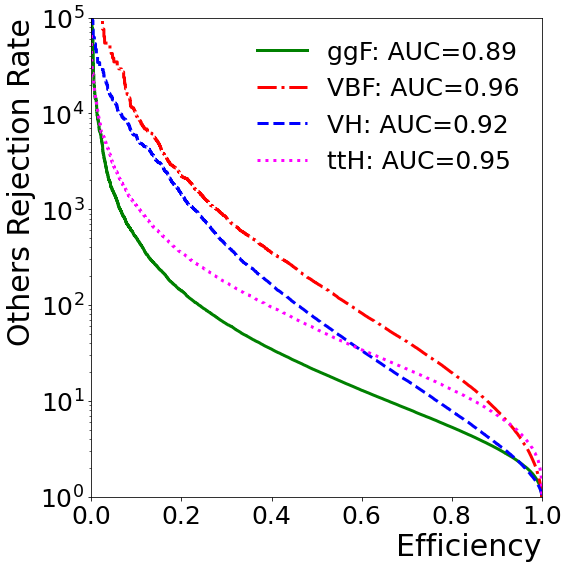

In [14]:
# prediction_GBDT_test = data_test["pre_BDT_out"+str(axis+1)]
prediction_2CNN_ggF_test = data_test["pre_2CNN_1n1c1c_out1"]
prediction_2CNN_VBF_test = data_test["pre_2CNN_1n1c1c_out2"]
prediction_2CNN_VH = data_test["pre_2CNN_1n1c1c_out3"]
prediction_2CNN_ttH_test = data_test["pre_2CNN_1n1c1c_out4"]


y_test = to_categorical(Y_test_weighted-1)

test_auc_2CNN_ggF_test = metrics.roc_auc_score(y_test[:,0],prediction_2CNN_ggF_test)
test_auc_2CNN_VBF_test = metrics.roc_auc_score(y_test[:,1],prediction_2CNN_VBF_test)
test_auc_2CNN_VH_test = metrics.roc_auc_score(y_test[:,2],prediction_2CNN_VH)
test_auc_2CNN_ttH_test = metrics.roc_auc_score(y_test[:,3],prediction_2CNN_ttH_test)

FalsePositiveFull_2CNN_ggF_test, TruePositiveFull_2CNN_ggF_test, _ = metrics.roc_curve(y_test[:,0],prediction_2CNN_ggF_test)
FalsePositiveFull_2CNN_VBF_test, TruePositiveFull_2CNN_VBF_test, _ = metrics.roc_curve(y_test[:,1],prediction_2CNN_VBF_test)
FalsePositiveFull_2CNN_VH_test, TruePositiveFull_2CNN_VH_test, _ = metrics.roc_curve(y_test[:,2],prediction_2CNN_VH)
FalsePositiveFull_2CNN_ttH_test, TruePositiveFull_2CNN_ttH_test, _ = metrics.roc_curve(y_test[:,3],prediction_2CNN_ttH_test)


fig, ax = plt.subplots(1,1, figsize=(8,8))


plt.plot(TruePositiveFull_2CNN_ggF_test,1/FalsePositiveFull_2CNN_ggF_test,"-", color='green', linewidth = 3,label='ggF: AUC={0:.2f}'.format(test_auc_2CNN_ggF_test))
plt.plot(TruePositiveFull_2CNN_VBF_test,1/FalsePositiveFull_2CNN_VBF_test,"-.", color='red', linewidth = 3, label='VBF: AUC={0:.2f}'.format(test_auc_2CNN_VBF_test))
plt.plot(TruePositiveFull_2CNN_VH_test,1/FalsePositiveFull_2CNN_VH_test,"--", color='blue', linewidth = 3, label='VH: AUC={0:.2f}'.format(test_auc_2CNN_VH_test))
plt.plot(TruePositiveFull_2CNN_ttH_test,1/FalsePositiveFull_2CNN_ttH_test,":", color='magenta', linewidth = 3, label='ttH: AUC={0:.2f}'.format(test_auc_2CNN_ttH_test))





plt.xlim((0,1))
plt.ylim((1,1E+5))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.yscale("log")
plt.ylabel('Others Rejection Rate', fontsize=30,horizontalalignment='right',y=1)
plt.xlabel("Efficiency", fontsize=30,horizontalalignment='right',x=1)
plt.legend(ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()


plt.savefig("./Plots/Comparison_ROC_4modes.pdf", transparent=True, bbox_inches='tight')
plt.show()

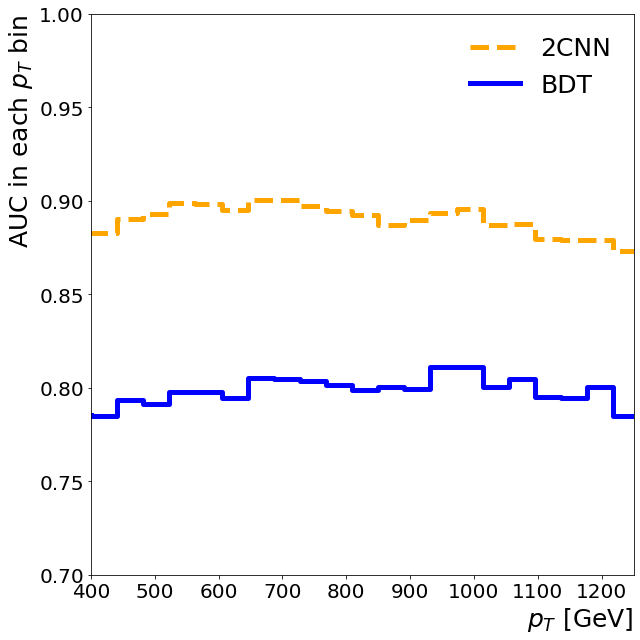

In [15]:
pt_max = 1300
pt_min = 400
nbin = int((pt_max-pt_min)/40)
pt_performance = np.zeros([nbin,5])
pt_range = np.linspace(pt_min,pt_max,nbin+1)

for i, element in enumerate(pt_range[:-1]):

    tmp = data_test[(data_test["PTH"] > pt_range[i]) & (data_test["PTH"] < pt_range[i+1])]

    Y_test_ = tmp["target"]
    y_test = to_categorical(Y_test_-1)

    prediction_GBDT_test_tmp = tmp["pre_BDT_out"+str(axis+1)]
    prediction_2CNN_1n1c1c_test_tmp = tmp["pre_2CNN_1n1c1c_out"+str(axis+1)]
    prediction_2CNN_0n1c1c_test_tmp = tmp["pre_2CNN_0n1c1c_out"+str(axis+1)]
    prediction_2CNN_1n0c1c_test_tmp = tmp["pre_2CNN_1n0c1c_out"+str(axis+1)]
    prediction_2CNN_1n1c0c_test_tmp = tmp["pre_2CNN_1n1c0c_out"+str(axis+1)]

    pt_performance[i,0] = metrics.roc_auc_score(y_test[:,axis],prediction_GBDT_test_tmp)
    pt_performance[i,1] = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n1c1c_test_tmp)
    pt_performance[i,2] = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_0n1c1c_test_tmp)
    pt_performance[i,3] = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n0c1c_test_tmp)
    pt_performance[i,4] = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_1n1c0c_test_tmp)

fig, ax = plt.subplots(1,1, figsize=(9,9))

# plt.step(pt_range[:-1],pt_performance[:,1],"-",color="orange",linewidth = 5,label="2CNN(1N1C1C)")
# plt.step(pt_range[:-1],pt_performance[:,2],":",color="green",linewidth = 5,label="2CNN(0N1C1C)")
# plt.step(pt_range[:-1],pt_performance[:,3],"-.",color="cyan",linewidth = 5,label="2CNN(1N0C1C)")
# plt.step(pt_range[:-1],pt_performance[:,4],"s",color="red",linewidth = 5,label="2CNN(1N1C0C)")
# plt.step(pt_range[:-1],pt_performance[:,0],"--",color="blue",linewidth = 5,label="BDT")

plt.step(pt_range[:-1],pt_performance[:,1],"--",color="orange",linewidth = 5,label="2CNN")
plt.step(pt_range[:-1],pt_performance[:,0],"-",color="blue",linewidth = 5,label="BDT")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("$p_T$ [GeV]", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel("AUC in each $p_T$ bin", fontsize=25,horizontalalignment='right',y=1)

plt.xlim((400,1250))
plt.ylim((0.7,1))
# plt.legend(bbox_to_anchor=(0.05, 0.8),ncol=2,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0) #,
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) #,
plt.savefig("./Plots/performance_vs_pT.pdf", transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

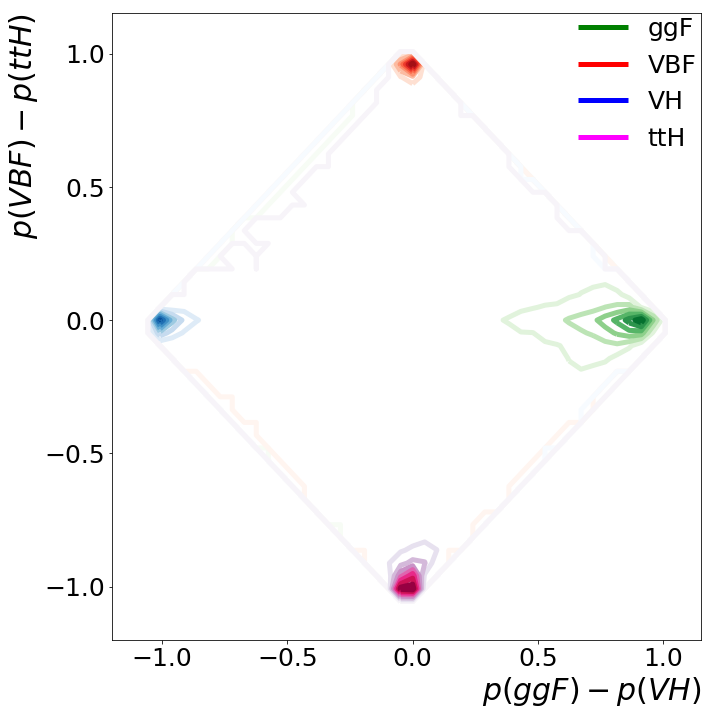

In [16]:
# ggH_test = Data_test[Data_test["isGGH"]==1]

# # VBF_train = Data_train[Data_train["isVBF"]==1]
# VBF_test = Data_test[Data_test["isVBF"]==1]

# # VH_train = Data_train[Data_train["isVH"]==1]
# VH_test = Data_test[Data_test["isVH"]==1]

# # ttH_train = Data_train[Data_train["isttH"]==1]
# ttH_test = Data_test[Data_test["isttH"]==1]

productions = [ggH_test,VBF_test,VH_test,ttH_test]

fig, ax = plt.subplots(1,1, figsize=(10,10))

title = ["ggF", "VBF", "VH", "ttH"]
COLOR = ["green","red","blue","magenta"]
CMAP = ["Greens","Reds","Blues","PuRd"]

for i, element in enumerate(productions):
    xbin = np.linspace(-1.2,1.2,51)
    hist2D, binx, biny = np.histogram2d(element["pre_2CNN_1n1c1c_out1"]-element["pre_2CNN_1n1c1c_out3"],
                                        element["pre_2CNN_1n1c1c_out2"]-element["pre_2CNN_1n1c1c_out4"],
                                        bins = xbin)
    plt.contour(binx[:-1],biny[:-1], hist2D.T,cmap=CMAP[i],linewidths=5) #
    plt.hlines(0.9, 0.85, 0.85, color=COLOR[i],label=title[i],linewidth =5)

# plt.xlim(0,10)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlabel("$p(ggF)-p(VH)$", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("$p(VBF)-p(ttH)$",fontsize=30,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1.03, 1.03),ncol=1,fontsize=25,frameon=False)
plt.tight_layout()
plt.savefig("./Plots/visualization_2CNN.pdf", transparent=True, bbox_inches='tight')

# plt.savefig("./Higgs_Pt/visualization_2CNN.png", transparent=True)
plt.show()